In [116]:
# Reload files
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Map generator prototype

This is a test python jupyter notebook to test generating maps for `Impatient drivers simulation`

map-pieces will contain a folder with map pieces imagesd and a json file containing data about each piece.

- each pece is 100x100 pixels

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt

import cv2 as cv
import numpy as np
import json

In [118]:
# Local Import
from src.Map.MapGrid import MapGrid

In [119]:
# Vars
map_pieces_folder = "map_pieces"
map_pieces_info_path = f"{map_pieces_folder}/pieces_info.json"

In [120]:
# load json assets file
with open(map_pieces_info_path, "r") as f:
    map_pieces = json.loads(f.read())

In [121]:
# Parse Json
for piece in map_pieces["Pieces"]:
    print(piece["name"], "Path:", piece["image_path"])

    # Load Map Images
    piece["image"] = cv.imread(f'{map_pieces_folder}/{piece["image_path"]}')

Straight Path: Straight.png
Turn Path: Turn.png
3WayIntersection Path: 3WayIntersection.png
4WayIntersection Path: 4WayIntersection.png
Roundabout Path: Roundabout.png
Filler Path: Filler.png
BigDiagonalLeft Path: BigDiagonalLeft.png
BigDiagonalRight Path: BigDiagonalRight.png


In [122]:
# Init MapGrid
testMap = MapGrid(map_pieces)

Initilizing Map
Process Data for set: Basic Roads


Border coords: ((0, 0), (0, 0))
Map dimensions: ((1, 1), (0, 0), (0, 0))
Map pixels: w:100, h:100
Start coords: (0, 0)


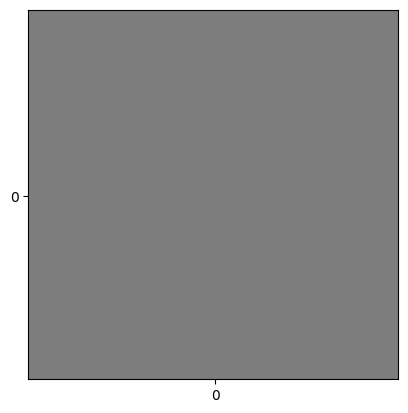

In [123]:
# Map Drawing
def draw_map(mapGrid: MapGrid):
    map_size, start_coords, end_coords = mapGrid.getDimensions()
    piece_size = 100

    map_w = map_size[0] * piece_size
    map_h = map_size[1] * piece_size
    print(f"Map pixels: w:{map_w}, h:{map_h}")
    
    plt.imshow(mapGrid.renderMap())
    plt.xticks(range(int(piece_size/2), map_w, piece_size), labels = range(start_coords[0], start_coords[0] + map_size[0]))
    plt.yticks(range(int(piece_size/2), map_h, piece_size), labels = range(start_coords[1] + map_size[1] - 1,start_coords[1] -1, -1));

# Coords
print("Border coords:", testMap.getBorderCoords())
print("Map dimensions:", testMap.getDimensions())
draw_map(testMap)

images to load - 4


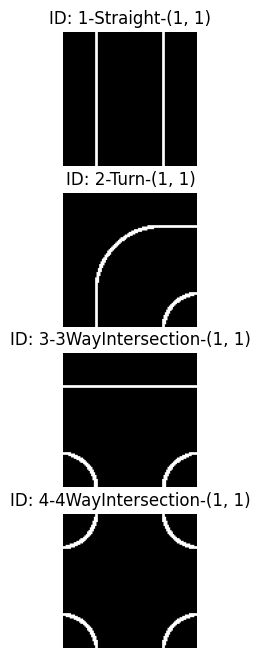

In [124]:
# Load map images:
n_limit = 4 # limit the pics
n_pictures = min(len(testMap.pieces), n_limit)
print(f"images to load - {n_pictures}")

picture_ids = list(testMap.pieces.keys())[:n_pictures]

fig, ax = plt.subplots(nrows=n_pictures,
                       ncols=1,
                       figsize = (2, n_pictures*2))

# Plot  for each different axis
for i in range(n_pictures):
    title = f'ID: {testMap.pieces[picture_ids[i]].id}-{testMap.pieces[picture_ids[i]].name}-{testMap.pieces[picture_ids[i]].size}'
    ax[i].set(title=title)
    ax[i].imshow(testMap.pieces[picture_ids[i]].image)
    ax[i].axis('off')

Initilizing Map
Process Data for set: Basic Roads
Border coords: ((-3, -2), (3, 2))
Map pixels: w:700, h:500
Start coords: (-3, -2)


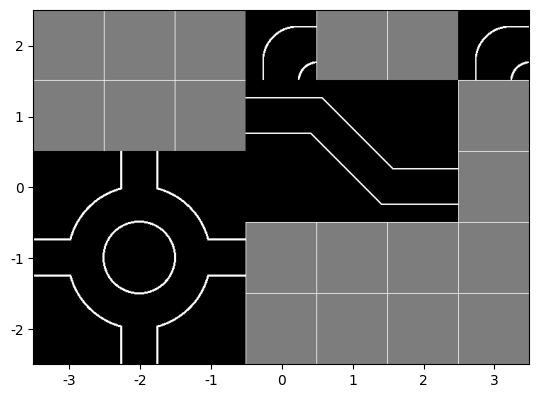

In [127]:
testMap = MapGrid(map_pieces)

elements_list = [
(8, 3, (0,0)),
(5, 3, (-3,-2)),
(2, 0, (3,2)),
(2, 0, (0,2))  
]

for item in elements_list:
    testMap.addItem(item[0], item[1], item[2])

# Coords
print("Border coords:", testMap.getBorderCoords())

draw_map(testMap)

In [130]:
testMap = MapGrid(map_pieces)

elements_list = [
(7, 0, (0,0)),
(1, 0, (4,4)),
(1, 0, (4,4)),
(3, 0, (4,5)),
(5, 0, (1,2)),
(20, 0, (4,5)),
(5, 0, (-2, -2))
]

for item in elements_list:
    try:
        testMap.addItem(item[0], item[1], item[2])
    except Exception as e:
        print(f"unable to add {item}, {e}")

Initilizing Map
Process Data for set: Basic Roads
unable to add (1, 0, (4, 4)), Area occupied: (4, 4)
unable to add (5, 0, (1, 2)), Area occupied: (1, 2)
unable to add (20, 0, (4, 5)), Invalid piece ID: 20
unable to add (5, 0, (-2, -2)), Area occupied: (-2, -2)


Map pixels: w:500, h:600
Start coords: (0, 0)


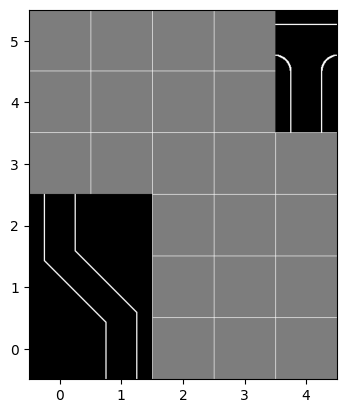

In [131]:
coords = (0, 0)
size = (0, 0)

if not testMap.checkCoords(coords, size):
    print("occupied")
    elementsInArea = testMap.getItemsFromCoords(coords, size)
    print("Elements")
    for element in elementsInArea:
        print(element, "Name:" ,testMap.pieces[element['ID']].name)


draw_map(testMap)

In [ ]:
testMap.getItemsFromCoords((-2,-2), (3,3))
#testMap.checkCoords((-2,-2), (3,3))

[{'ID': 7, 'rotation': 0, 'coords': (0, 0)},
 {'ID': 5, 'rotation': 0, 'coords': (-2, -2)},
 {'ID': 5, 'rotation': 0, 'coords': (-2, -2)},
 {'ID': 5, 'rotation': 0, 'coords': (-2, -2)},
 {'ID': 5, 'rotation': 0, 'coords': (-2, -2)}]

In [ ]:
testMap.mapElements

[{'ID': 7, 'rotation': 0, 'coords': (0, 0)},
 {'ID': 1, 'rotation': 0, 'coords': (4, 4)},
 {'ID': 3, 'rotation': 0, 'coords': (4, 5)},
 {'ID': 5, 'rotation': 0, 'coords': (-2, -2)},
 {'ID': 5, 'rotation': 0, 'coords': (-2, -2)},
 {'ID': 5, 'rotation': 0, 'coords': (-2, -2)},
 {'ID': 5, 'rotation': 0, 'coords': (-2, -2)},
 {'ID': 5, 'rotation': 0, 'coords': (-2, -2)}]